# Nave Bayes Binary Text Classification
* Text Base binary classification
* work by caculating the probability of a given text belonging to each class
* it is particulary usefull for classifying large volumes of text due to its speed and accuracy.
* best choice for binary classifcation


# https://www.kaggle.com/competitions/sentiment-analysis-on-movie-reviews/data

The sentiment labels are:

0. - **negative**
1. - somewhat negative
2. - neutral
3. - somewhat positive
4. - **positive**

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df1 = pd.read_feather("./data.feather")
df1.head()

,Phrase,Sentiment,input_data
0,would have a hard time sitting through this one,0,"['would, hard, time, sit, one, ']"
1,have a hard time sitting through this one,0,"['have, hard, time, sit, one, ']"
2,Aggressive self-glorification and a manipulati...,0,"['aggressive, self, clarification, manipulativ..."
3,self-glorification and a manipulative whitewash,0,"['self, clarification, manipulative, whitewash..."
4,Trouble Every Day is a plodding mess .,0,"['trouble, every, day, pad, mess, ., ']"


In [11]:
row1 = df1.values[0]
print(row1[0],type(row1[0]))
print(row1[1],type(row1[1]))
print(row1[2],type(row1[2]))


would have a hard time sitting through this one <class 'str'>
0 <class 'int'>
["'would" 'hard' 'time' 'sit' 'one' "'"] <class 'numpy.ndarray'>


In [12]:
df1['input_data'].apply(lambda x: " ".join(x))

0                               'would hard time sit one '
1                                'have hard time sit one '
2        'aggressive self clarification manipulative wh...
3             'self clarification manipulative whitewash '
4                          'trouble every day pad mess . '
                               ...                        
16273                                'is laugh enjoyable '
16274          ' unique culture present universal appeal '
16275                             'with universal appeal '
16276    'really great job anchor character emotional r...
16277    ' great job anchor character emotional realiti...
Name: input_data, Length: 16278, dtype: object

In [13]:
df1['input_data1'] = df1['input_data'].apply(lambda x: " ".join(x))
df1.head()

,Phrase,Sentiment,input_data,input_data1
0,would have a hard time sitting through this one,0,"['would, hard, time, sit, one, ']",'would hard time sit one '
1,have a hard time sitting through this one,0,"['have, hard, time, sit, one, ']",'have hard time sit one '
2,Aggressive self-glorification and a manipulati...,0,"['aggressive, self, clarification, manipulativ...",'aggressive self clarification manipulative wh...
3,self-glorification and a manipulative whitewash,0,"['self, clarification, manipulative, whitewash...",'self clarification manipulative whitewash '
4,Trouble Every Day is a plodding mess .,0,"['trouble, every, day, pad, mess, ., ']",'trouble every day pad mess . '


In [15]:
df1.Sentiment.value_counts()

1    9206
0    7072
Name: Sentiment, dtype: int64

In [17]:
df1.Sentiment.value_counts(normalize=True) * 100

1    56.554859
0    43.445141
Name: Sentiment, dtype: float64

In [18]:
9206 / (9206+7072)

0.565548593193267

In [27]:
print((df1.Sentiment.value_counts()*20/100).sum())
df1.Sentiment.value_counts()*20/100

3255.6000000000004


1    1841.2
0    1414.4
Name: Sentiment, dtype: float64

In [45]:
test = pd.concat([df1[df1.Sentiment==1].sample(1841),
                  df1[df1.Sentiment==0].sample(1414)])[["input_data1","Sentiment"]]

print(len(test))
test.head()


3255


,input_data1,Sentiment
13080,"'good action , good act , good dialogue '",1
12772,'is win comedy excite imagination tackle funny...,1
14402,'much dramatic impact ',1
7278,"'an example kind lush , develop movie experien...",1
9384,"'executed gentle insistent sincerity , good hu...",1


In [37]:
(~df1.index.isin(test.index.values))

array([ True,  True,  True, ...,  True,  True,  True])

In [46]:
train = df1.loc[(~df1.index.isin(test.index.values)),["input_data1","Sentiment"]]
print(len(train))
train.head()

13023


,input_data1,Sentiment
0,'would hard time sit one ',0
2,'aggressive self clarification manipulative wh...,0
3,'self clarification manipulative whitewash ',0
4,'trouble every day pad mess . ',0
5,'is pad mess ',0


In [33]:
print(len(df1))

16278


<img src="https://miro.medium.com/max/1400/1*OEmWDt4eztOcm5pr2QbxfA.png">

In [47]:
X = df1[["input_data1"]] # corpus all text from your dataset
X.head()

,input_data1
0,'would hard time sit one '
1,'have hard time sit one '
2,'aggressive self clarification manipulative wh...
3,'self clarification manipulative whitewash '
4,'trouble every day pad mess . '


# Now convert our corpus into vector with sklearn

In [52]:
from sklearn.feature_extraction.text import TfidfVectorizer
#list of text document
courpus = X.input_data1.values
# create transorm
vectorizer = TfidfVectorizer()
# tokeniz and build vocab
vectorizer.fit(courpus)
#summarize
# print(vectorizer.vocabulary_)

dict(sorted(vectorizer.vocabulary_.items(), key=lambda item: item[1]))

{'000': 0,
 '10': 1,
 '100': 2,
 '101': 3,
 '102': 4,
 '103': 5,
 '104': 6,
 '105': 7,
 '11': 8,
 '110': 9,
 '112': 10,
 '12': 11,
 '120': 12,
 '127': 13,
 '129': 14,
 '12th': 15,
 '13': 16,
 '14': 17,
 '140': 18,
 '146': 19,
 '15': 20,
 '16': 21,
 '18': 22,
 '19': 23,
 '1920': 24,
 '1930s': 25,
 '1937': 26,
 '1950': 27,
 '1950s': 28,
 '1953': 29,
 '1957': 30,
 '1958': 31,
 '1959': 32,
 '1960': 33,
 '1962': 34,
 '1970s': 35,
 '1975': 36,
 '1984': 37,
 '1989': 38,
 '1991': 39,
 '1993': 40,
 '1997': 41,
 '19th': 42,
 '20': 43,
 '2000': 44,
 '2001': 45,
 '2002': 46,
 '20th': 47,
 '21': 48,
 '21st': 49,
 '22': 50,
 '24': 51,
 '2455': 52,
 '25': 53,
 '270': 54,
 '295': 55,
 '30': 56,
 '300': 57,
 '3000': 58,
 '30s': 59,
 '3d': 60,
 '40': 61,
 '40s': 62,
 '451': 63,
 '48': 64,
 '4ever': 65,
 '4th': 66,
 '50': 67,
 '500': 68,
 '50s': 69,
 '51': 70,
 '52': 71,
 '5ths': 72,
 '60': 73,
 '60s': 74,
 '65': 75,
 '65th': 76,
 '70s': 77,
 '71': 78,
 '75': 79,
 '78': 80,
 '80': 81,
 '800': 82,
 '80s':

# Now transform Training and Testing input text into vector using above vocab

In [59]:
train_x = vectorizer.transform(train.input_data1.values).toarray()
test_x = vectorizer.transform(test.input_data1.values).toarray()

train_y  = train.Sentiment.values
test_y = test.Sentiment.values

print(f"Training X: {len(train_x)} and Y: {len(train_y)}")
print(f"Testing X: {len(test_x)} and Y: {len(test_y)}")

Training X: 13023 and Y: 13023
Testing X: 3255 and Y: 3255


# Bernoulli Naive Bayes for Binary Classification

In [60]:
from sklearn.naive_bayes import BernoulliNB

clf = BernoulliNB()

clf.fit(train_x, train_y)

BernoulliNB()

# Now Apply prediction on Unseendata

In [61]:
y_predict = clf.predict(test_x)
y_predict

array([1, 1, 1, ..., 0, 0, 1])

# sklearn.metrics.classification_report

In [66]:
from sklearn.metrics import confusion_matrix, accuracy_score

cm = confusion_matrix(test_y, y_predict)
cm


array([[1247,  167],
       [ 104, 1737]])

<img src="https://camo.githubusercontent.com/64c6b2f75b9f7b1689c90077dddcd531fefb755f84cfce4b8efae4ca0d112918/68747470733a2f2f6d69726f2e6d656469756d2e636f6d2f6d61782f3731322f312a5a35344a6762533444557757536b6e684443764e54512e706e67">

In [63]:
from sklearn.metrics import classification_report

#                            Actual, un-seen-data
print(classification_report(test_y,y_predict))

              precision    recall  f1-score   support

           0       0.92      0.88      0.90      1414
           1       0.91      0.94      0.93      1841

    accuracy                           0.92      3255
   macro avg       0.92      0.91      0.91      3255
weighted avg       0.92      0.92      0.92      3255



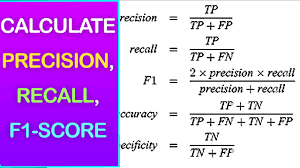

In [67]:
accuracy_score(test_y, y_predict)

0.9167434715821813